# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

NumPy 1.21.5
Pandas 1.4.4
Matplotlib 3.5.2
Seaborn 0.11.2


In [3]:
# Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Pandas show all column
pd.set_option('display.max_columns', 50)

# Load Dataset

In [5]:
df_raw = pd.read_csv('online_shoppers_intention.csv')

In [6]:
df = df_raw.copy()

In [7]:
df.shape

(12330, 18)

# Exploratory Data Analysis

## Descriptive Statistics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Sampling untuk memahami data

In [9]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8827,3,36.0,2,763.0,9,163.500000,0.000000,0.014286,0.000000,0.0,Dec,8,2,1,2,New_Visitor,False,True
5726,0,0.0,0,0.0,3,50.200000,0.000000,0.066667,0.000000,0.0,Sep,2,2,1,13,Returning_Visitor,False,False
10905,0,0.0,0,0.0,14,419.375000,0.042857,0.083333,0.000000,0.0,Nov,2,2,8,1,Returning_Visitor,False,False
4885,0,0.0,0,0.0,14,148.000000,0.064286,0.100000,0.000000,0.6,May,4,1,4,1,Returning_Visitor,False,False
9899,0,0.0,0,0.0,23,1544.595238,0.058551,0.092945,0.000000,0.0,Nov,3,2,8,13,Returning_Visitor,True,False
6945,1,51.4,0,0.0,41,883.139524,0.017949,0.033333,48.788069,0.0,Jul,2,2,3,3,Returning_Visitor,False,True
6329,2,42.4,0,0.0,5,163.200000,0.000000,0.028571,20.716781,0.0,Aug,2,10,3,3,Returning_Visitor,False,True
4158,0,0.0,0,0.0,6,210.200000,0.055556,0.068056,0.000000,0.0,May,3,2,4,20,Returning_Visitor,False,False
1349,1,0.0,0,0.0,43,1286.688889,0.004545,0.030266,4.289293,0.0,Mar,3,2,1,6,Returning_Visitor,False,False
205,3,281.0,0,0.0,16,453.750000,0.000000,0.005263,0.000000,0.0,Mar,2,2,5,2,New_Visitor,False,False


### Ubah tipe data

In [10]:
df['OperatingSystems']=df['OperatingSystems'].astype('object')
df['Browser']=df['Browser'].astype('object')
df['Region']=df['Region'].astype('object')
df['TrafficType']=df['TrafficType'].astype('object')
df['Weekend']=df['Weekend'].astype('int64')

In [11]:
df['Weekend']=df['Weekend'].astype('object')
df['Revenue']=df['Revenue'].astype('int64')

### Pengelompokan kolom berdasarkan jenisnya

In [12]:
# Pengelompokan kolom berdasarkan jenisnya
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes != 'object' and i != 'Revenue']

## Statistical summary

In [13]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [14]:
df[cats].describe().T

,count,unique,top,freq
Month,12330,10,May,3364
OperatingSystems,12330,8,2,6601
Browser,12330,13,2,7961
Region,12330,9,1,4780
TrafficType,12330,20,2,3913
VisitorType,12330,3,Returning_Visitor,10551
Weekend,12330,2,0,9462


In [15]:
# Count values
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

Value count kolom OperatingSystems:
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

Value count kolom Browser:
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

Value count kolom Region:
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

Value count kolom TrafficType:
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

Value count kolom VisitorType:
Return

### Feature Target

In [16]:
target = df['Revenue'].value_counts()
target

0    10422
1     1908
Name: Revenue, dtype: int64

In [17]:
counts = df['Revenue'].value_counts(normalize=True)
counts

0    0.845255
1    0.154745
Name: Revenue, dtype: float64

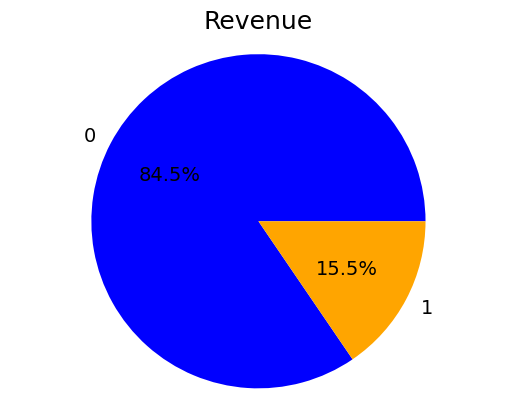

In [23]:
value_counts = df['Revenue'].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[0], value_counts[1]], labels=['0', '1'], 
           colors=['blue', 'orange'], textprops={'color':'black', 'fontsize':14}, autopct='%1.1f%%')
_ = ax.axis('equal')
_ = ax.set_title('Revenue', fontsize=18)

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Boxplot

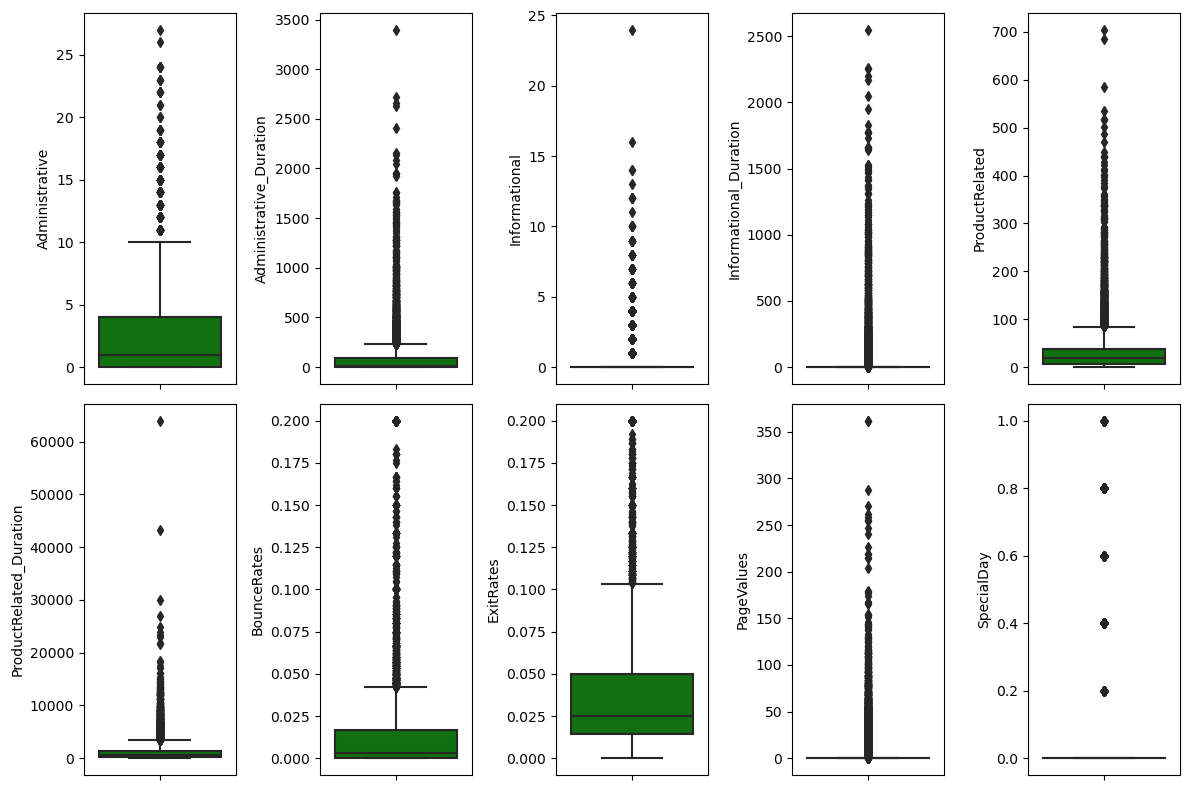

In [24]:
# Pengecekan distribusi dari fitur numerical menggunakan boxplot
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Histogram

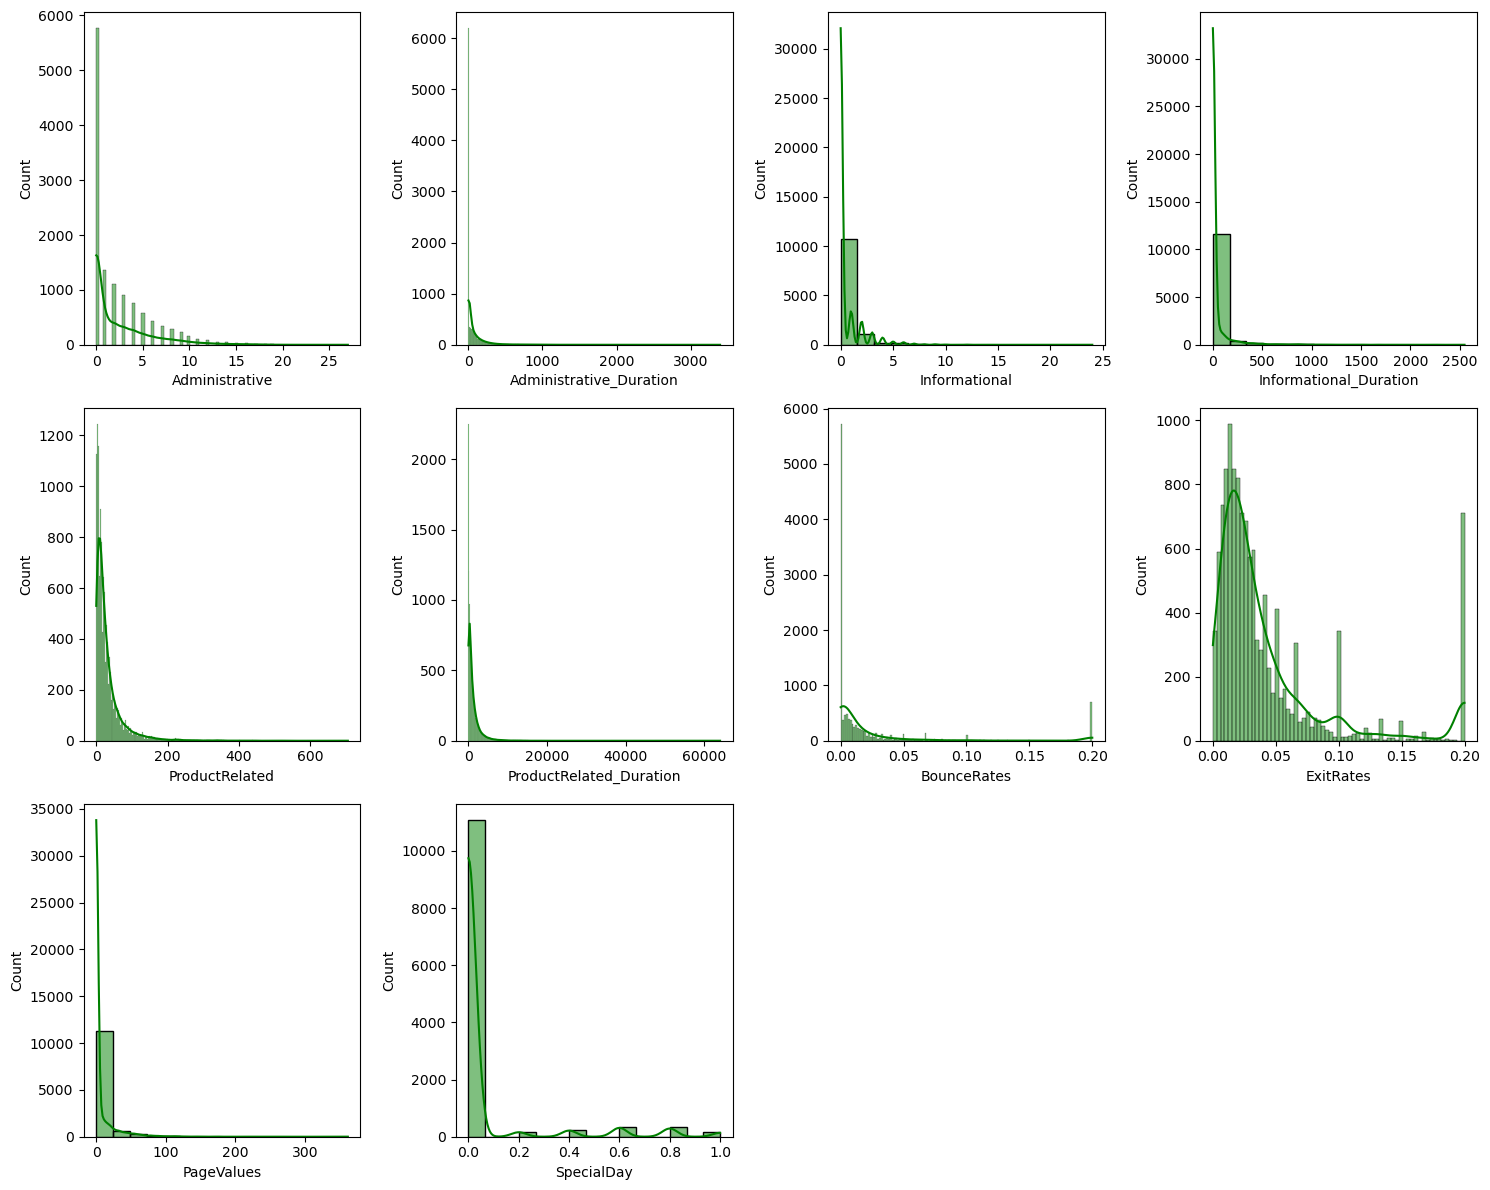

In [25]:
# Pengecekan distribusi dari fitur numerical dengan menggunakan histplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[nums[i]], color='green', kde=True)
    plt.tight_layout()

### Countplot (categorical)

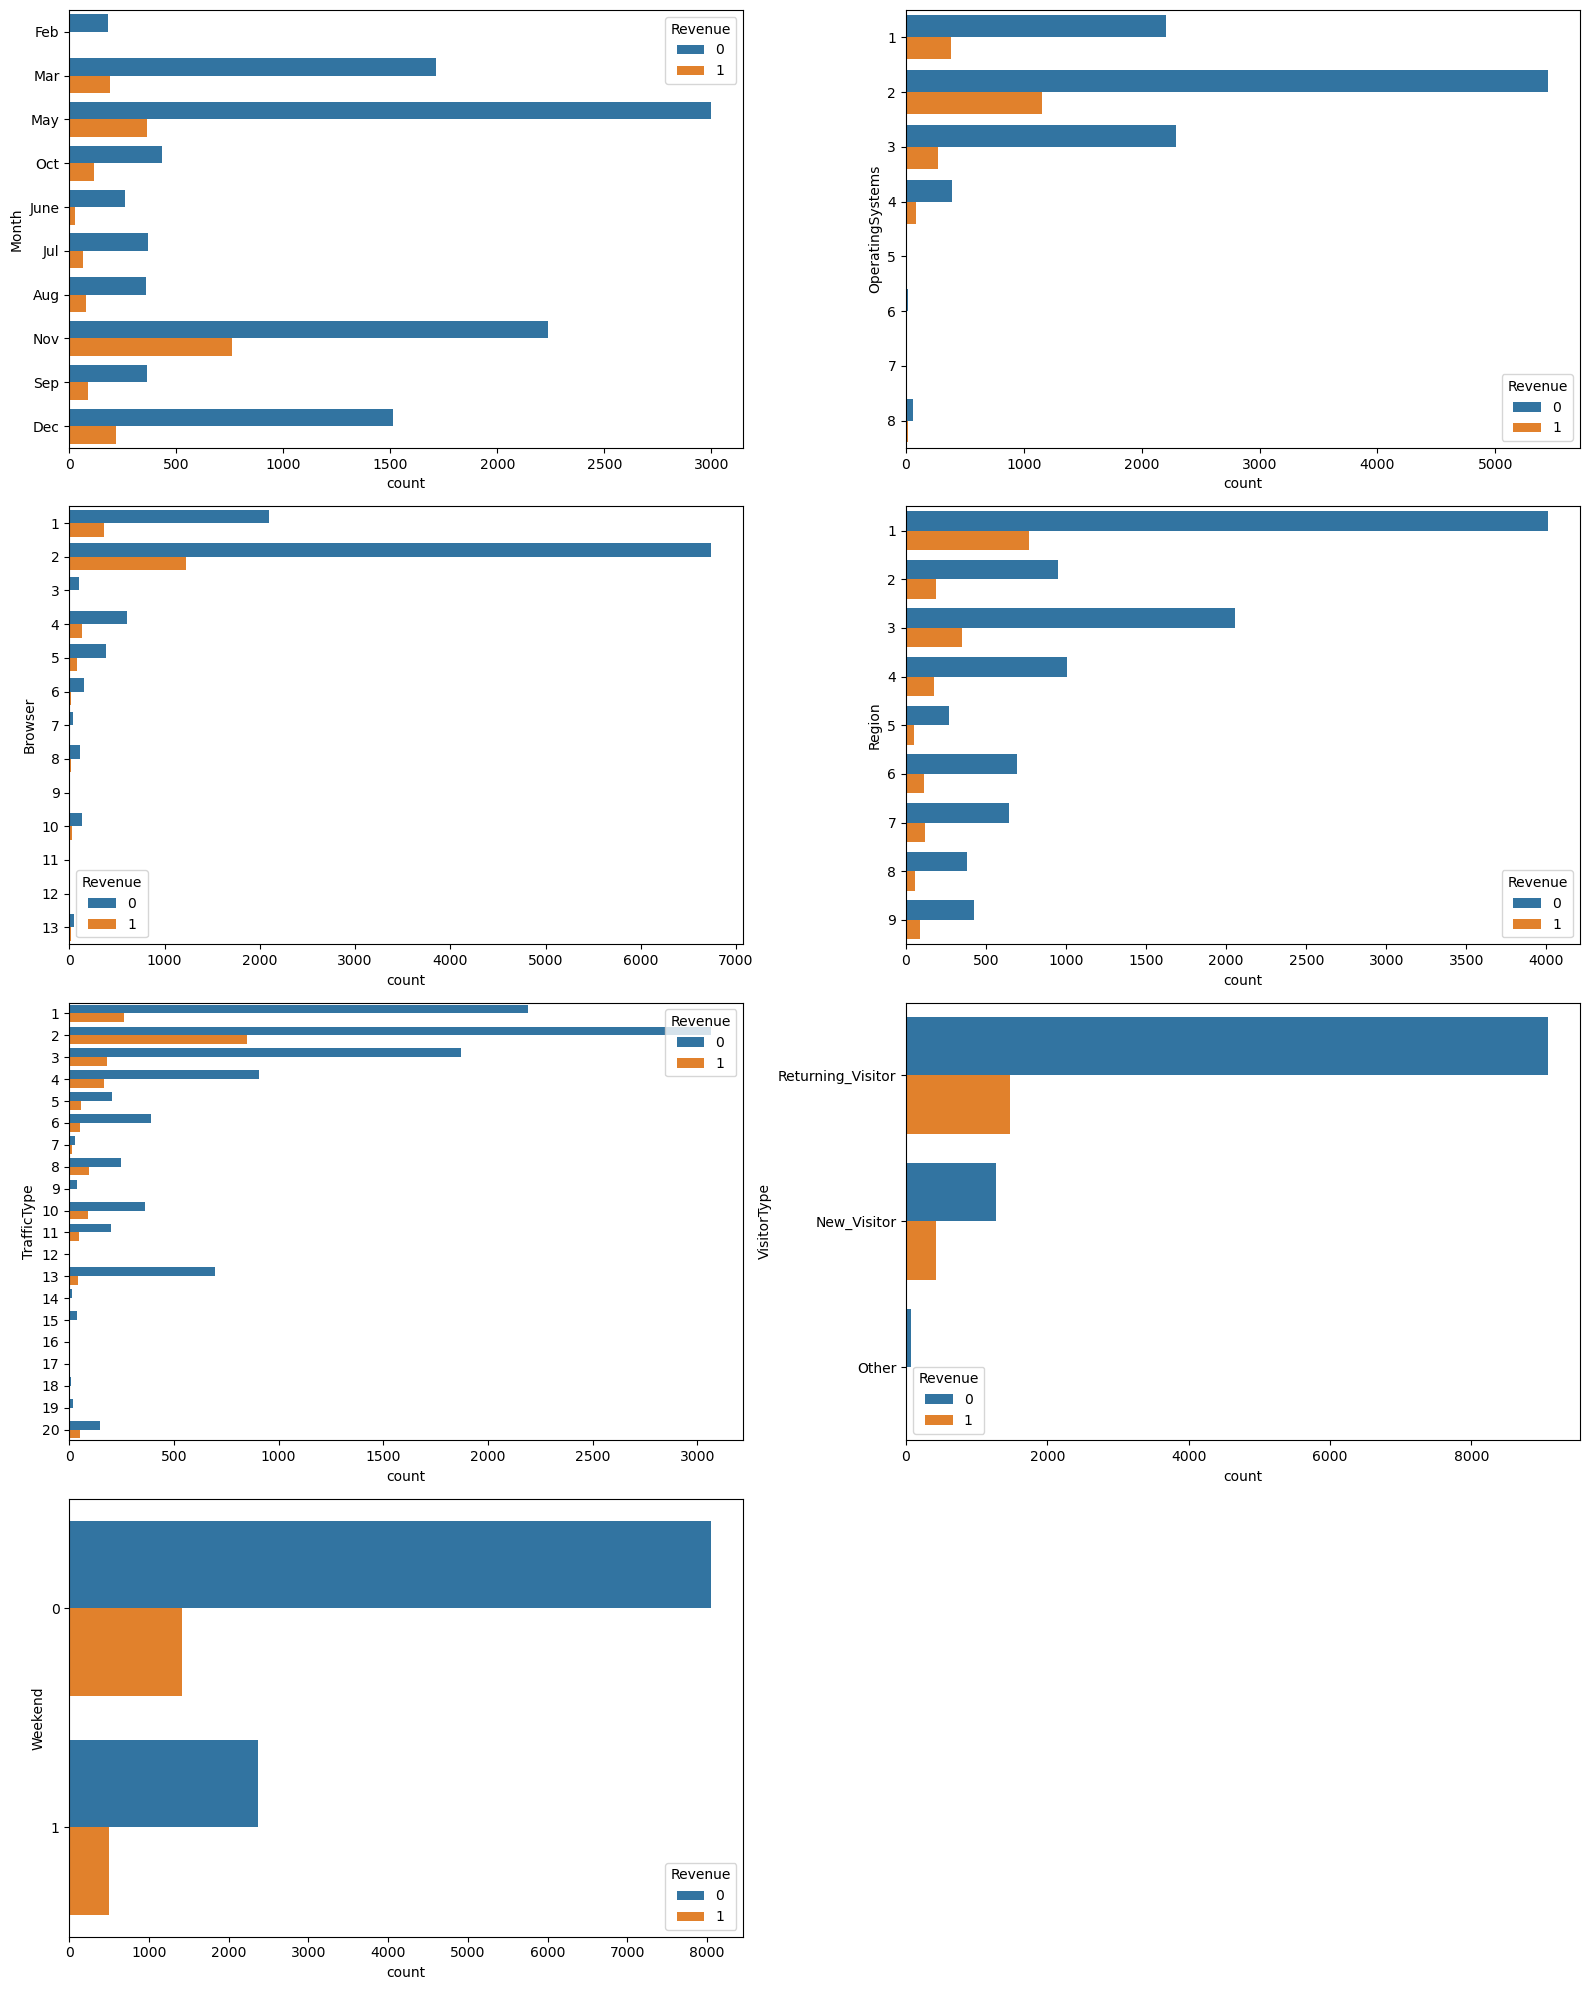

In [26]:
# Pengecekan distribusi dari fitur categorical menggunakan countplot
plt.figure(figsize=(16, 20))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(y = df[cats[i]], orient='v', hue=df['Revenue'])
    plt.tight_layout()

## Multivariate Analysis

Sekarang kita akan melihat hubungan antar kolom untuk mengetahui hubungan antar kolom, dengan begitu dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation Heatmap

<AxesSubplot:>

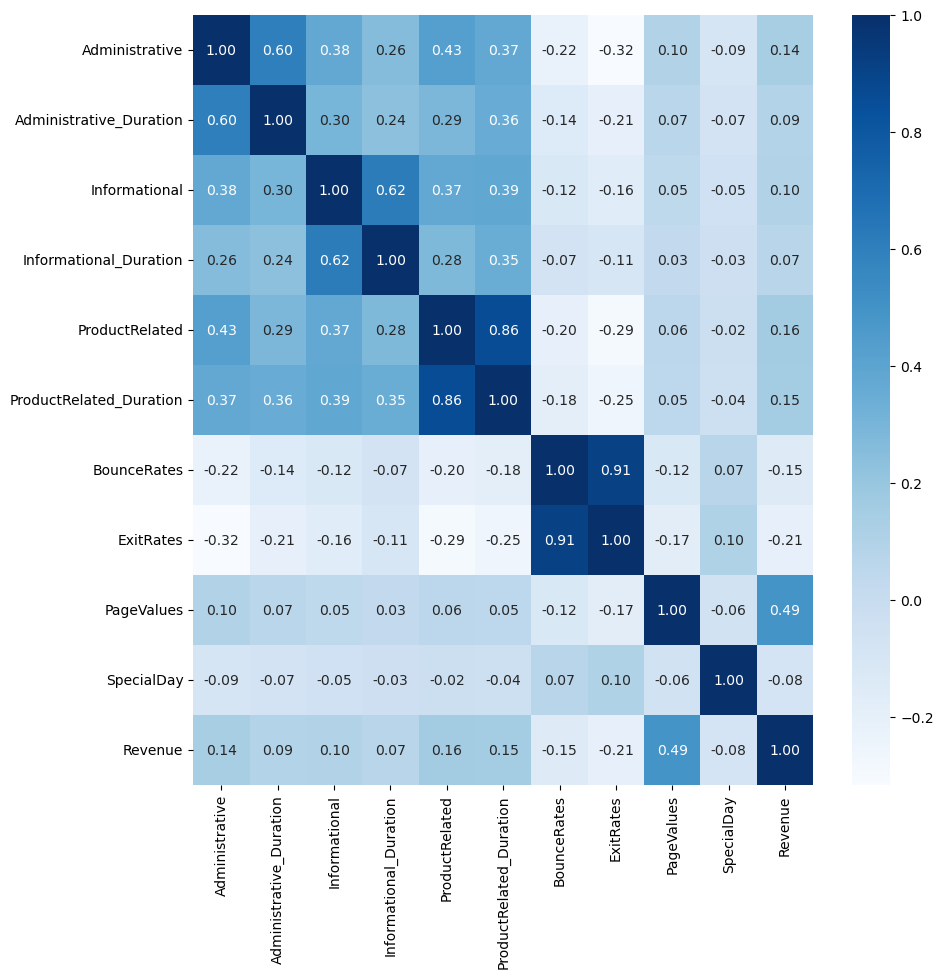

In [27]:
# Pengecekan korelasi antar feature dengan Correlation Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Category Plot

#### Untuk melihat korelasi data numerik terhadap feature `Revenue`

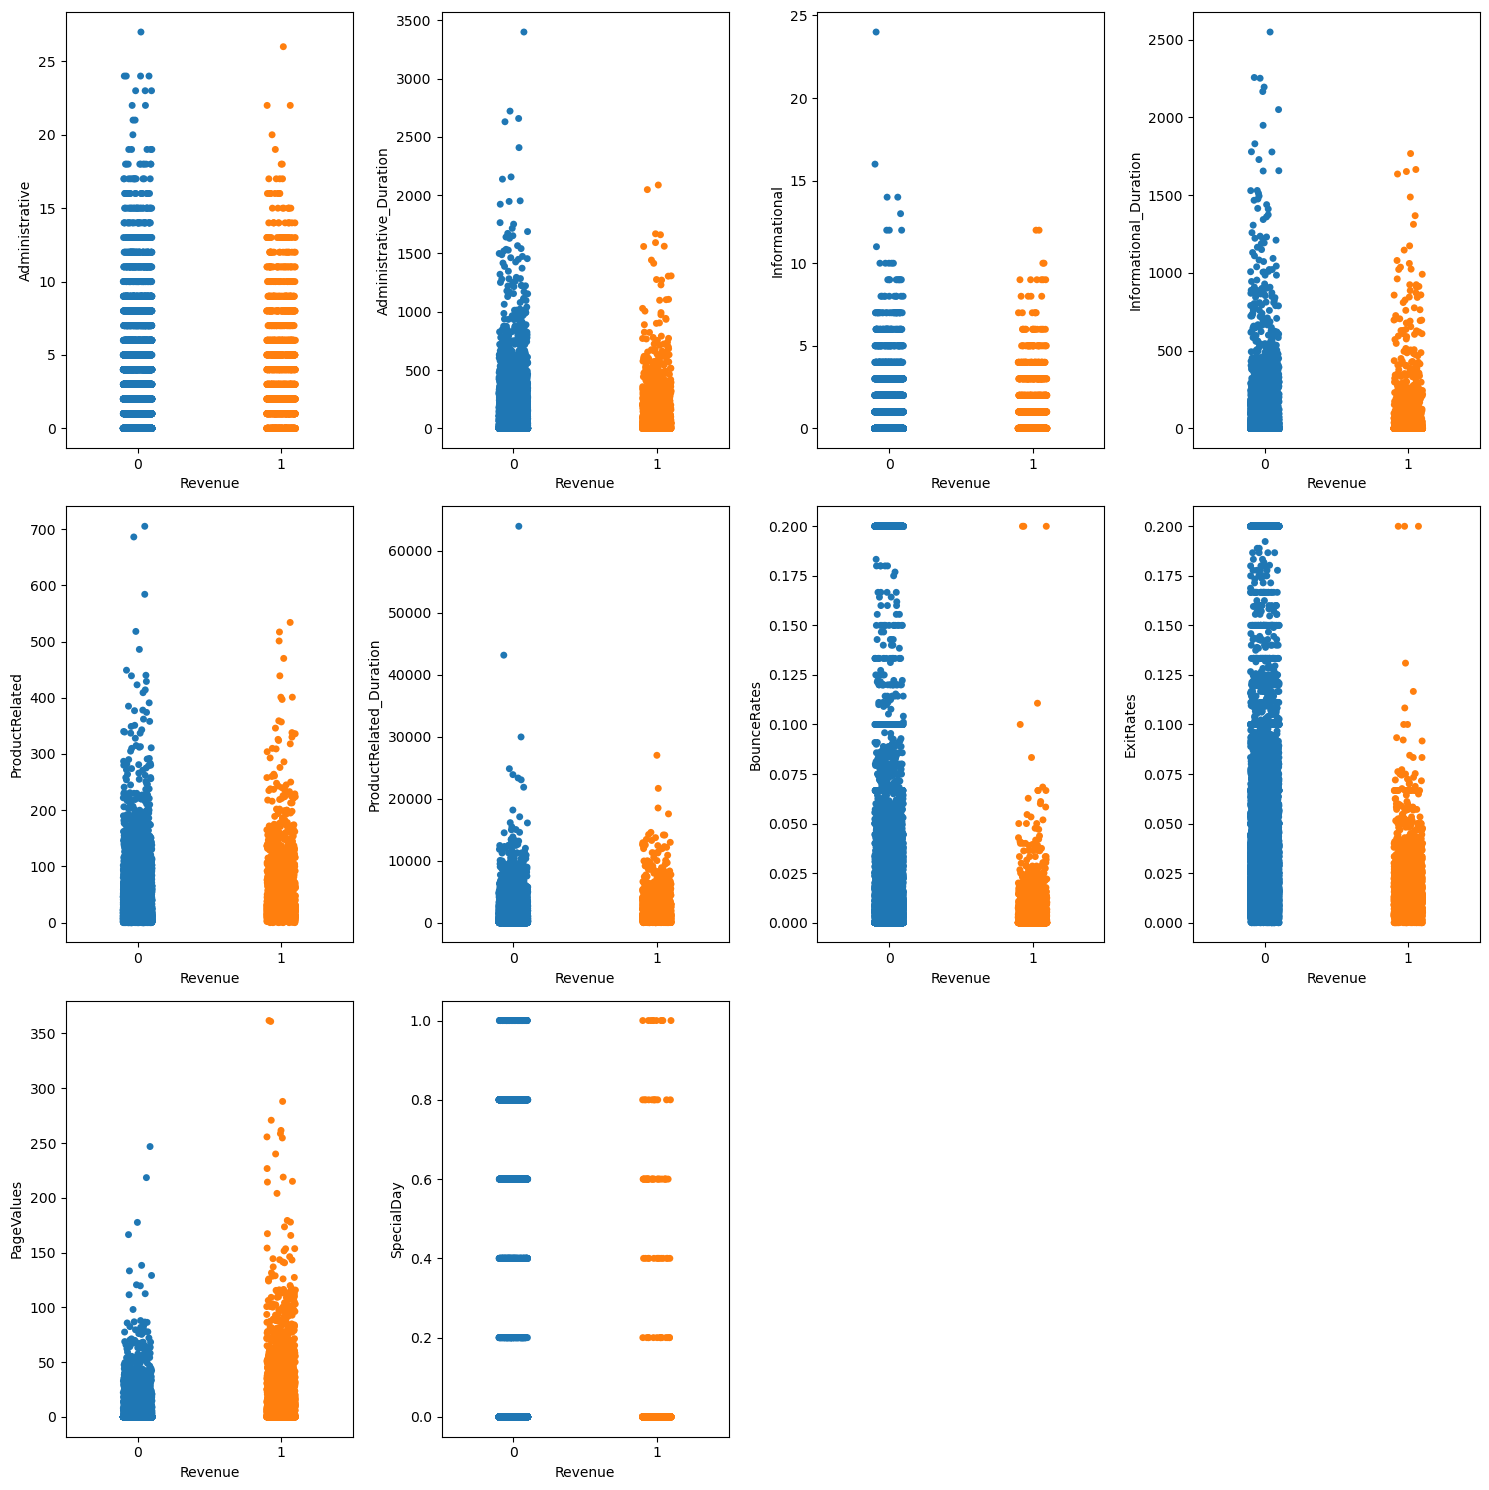

In [28]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Revenue', y=nums[i]) # gambar catplot/stripplotnya
    plt.tight_layout()

#### Untuk melihat korelasi feature `BounceRates`, `ExitRates`, `PageValues`  terhadap feature `Revenue`

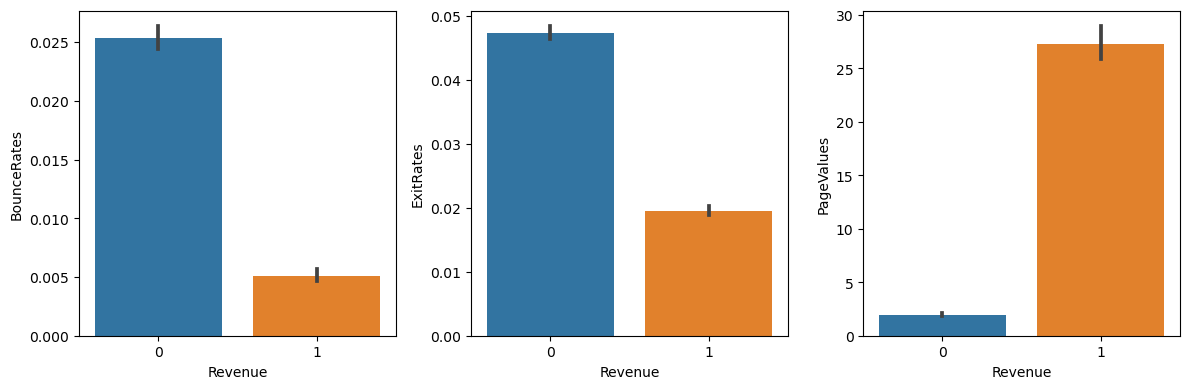

In [29]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

sns.barplot(x='Revenue', y='BounceRates', data=df, ax=axes[0])
sns.barplot(x='Revenue', y='ExitRates', data=df, ax=axes[1])
sns.barplot(x='Revenue', y='PageValues', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

# Data Cleansing

### Missing Value

Kita akan melakukan handling terhadap data yang **null** atau **nan**.

In [30]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### Duplicate Data

In [31]:
# Cek duplikat
df.duplicated().sum()

125

In [32]:
df_clean = df.copy()

### Handle Outliers

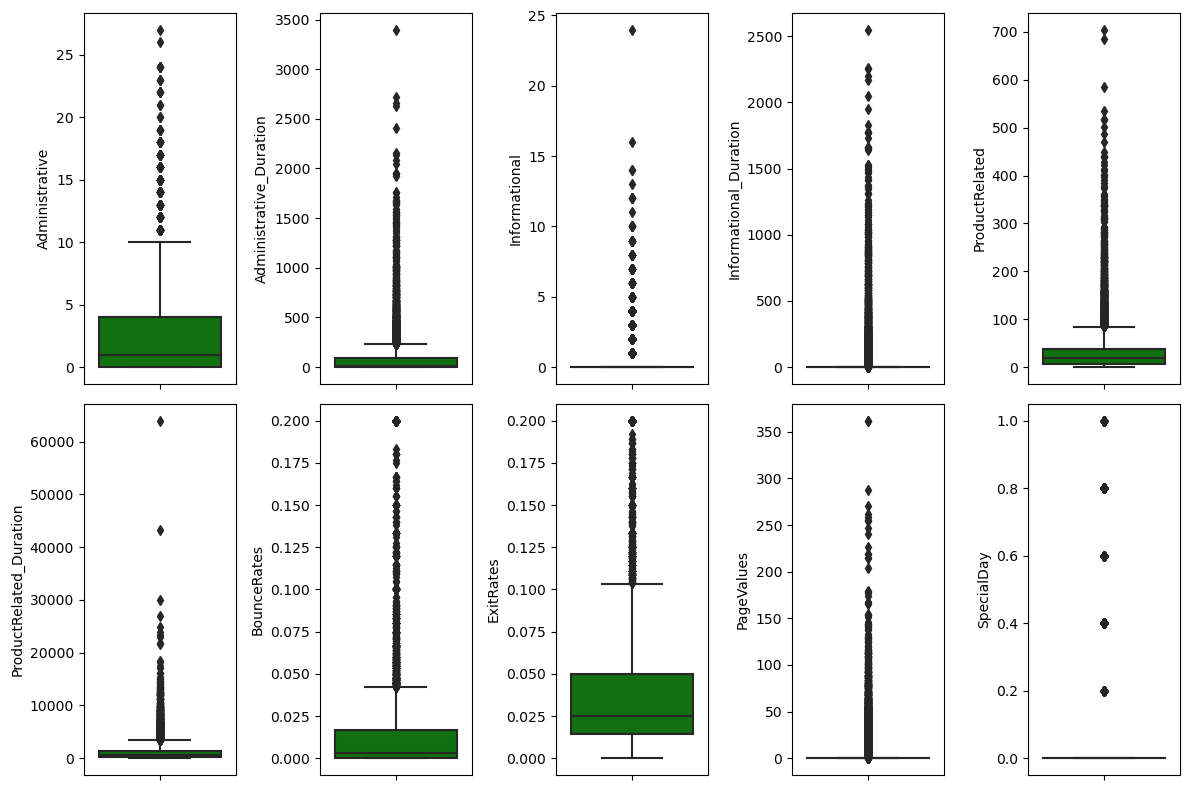

In [33]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Log Transformation

In [34]:
feature_log = ['Administrative', 'Informational', 'ProductRelated']

for i in feature_log:
    df[i] = df[i].apply(lambda x: np.log(x) if x != 0 else 0)

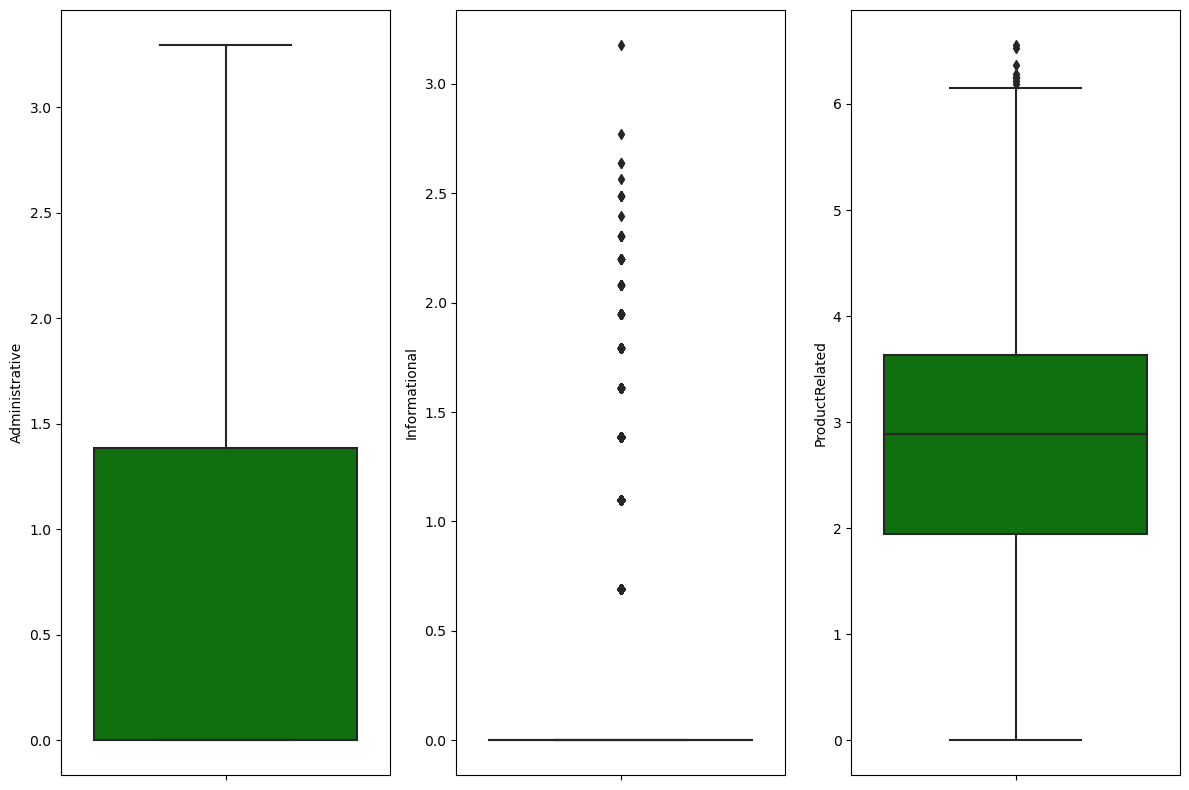

In [35]:
plt.figure(figsize=(12,8))
for i in range(0, len(feature_log)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[feature_log[i]], color='green', orient='v')
    plt.tight_layout()

### Z-Score

In [36]:
df_zscore=df.copy()

In [37]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_zscore)}')

filtered_entries = np.array([True] * len(df_zscore))

for col in ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates',
            'ExitRates', 'PageValues', 'SpecialDay']:
    zscore = abs(stats.zscore(df_zscore[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_zscore = df_zscore[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

df_zscore = df_zscore.reset_index(drop = True)

Jumlah baris sebelum memfilter outlier: 12330
Jumlah baris setelah memfilter outlier: 10317


**Data Setelah dilakukan handling outlier**

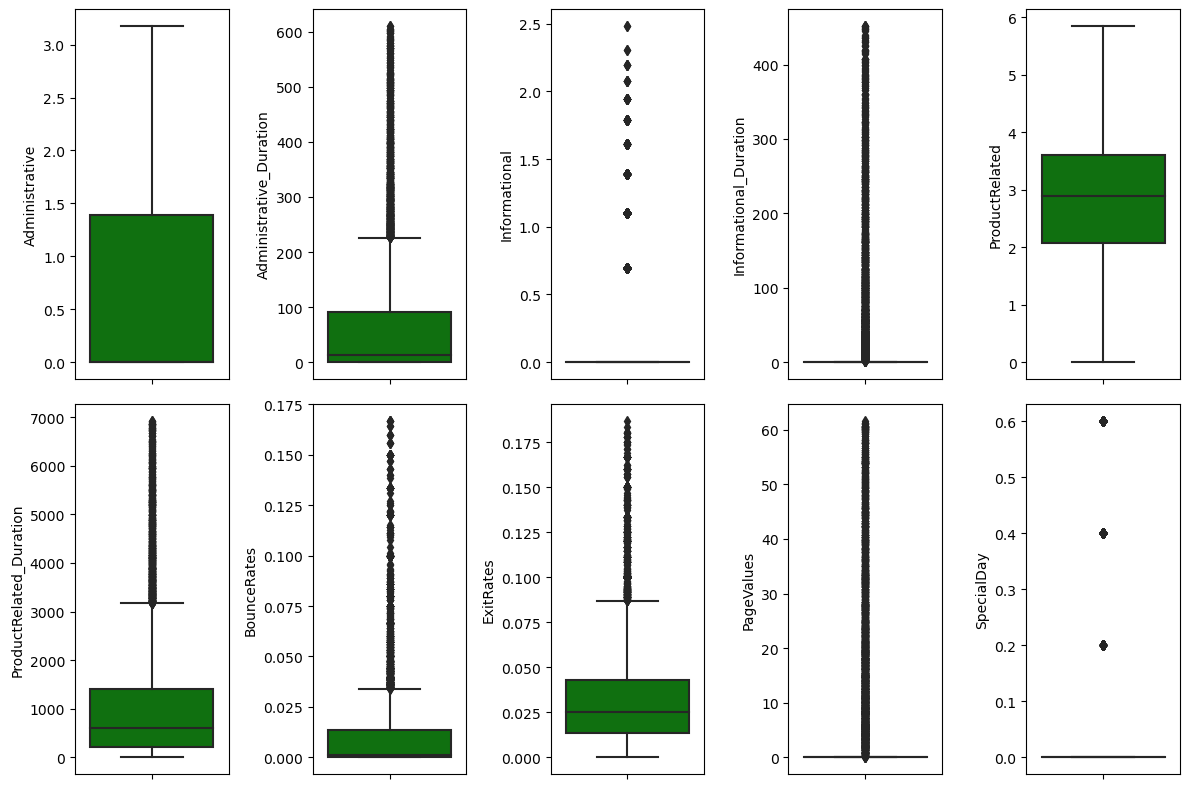

In [38]:
plt.figure(figsize=(12,8))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df_zscore[nums[i]], color='green', orient='v')
    plt.tight_layout()

### Feature Selection

In [39]:
df_fs = df_zscore.copy()

In [40]:
df_fs = df_fs[['Administrative', 'Administrative_Duration', 'Informational' ,'Informational_Duration',
               'ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems',
               'Browser', 'Region', 'VisitorType', 'Weekend']]

### Feature Transformation

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_fs['Administrative_std'] = StandardScaler().fit_transform(df_fs['Administrative'].values.reshape(len(df_fs),1))
df_fs['Administrative_Duration_std'] = StandardScaler().fit_transform(df_fs['Administrative_Duration'].values.reshape(len(df_fs),1))
df_fs['Informational_std'] = StandardScaler().fit_transform(df_fs['Informational'].values.reshape(len(df_fs),1))
df_fs['Informational_Duration_std'] = StandardScaler().fit_transform(df_fs['Informational_Duration'].values.reshape(len(df_fs),1))
df_fs['ProductRelated_std'] = StandardScaler().fit_transform(df_fs['ProductRelated'].values.reshape(len(df_fs),1))
df_fs['ProductRelated_Duration_std'] = StandardScaler().fit_transform(df_fs['Informational_Duration'].values.reshape(len(df_fs),1))
df_fs['ExitRates_std'] = StandardScaler().fit_transform(df_fs['ExitRates'].values.reshape(len(df_fs),1))
df_fs['PageValues_std'] = StandardScaler().fit_transform(df_fs['PageValues'].values.reshape(len(df_fs),1))
df_fs['SpecialDay_std'] = StandardScaler().fit_transform(df_fs['SpecialDay'].values.reshape(len(df_fs),1))

In [47]:
df_std = df_fs.drop(['Administrative', 'Administrative_Duration', 'Informational' ,'Informational_Duration',
                     'ProductRelated', 'ExitRates', 'PageValues', 'SpecialDay'], axis=1)

df_std.head()

,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ProductRelated_Duration_std,ExitRates_std,PageValues_std,SpecialDay_std
0,Feb,2,2,1,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,-2.019250,-0.311739,2.209503,-0.381732,-0.252689
1,Feb,3,2,2,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,-2.019250,-0.311739,3.544910,-0.381732,-0.252689
2,Feb,3,3,1,Returning_Visitor,1,-0.77378,-0.623569,-0.334313,-0.311739,-0.508967,-0.311739,0.540244,-0.381732,-0.252689
3,Feb,2,2,1,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,0.093343,-0.311739,-0.309028,-0.381732,-0.252689
4,Feb,2,4,1,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,-1.638765,-0.311739,-0.387122,-0.381732,3.096051


### Feature Encoding

**Label encoding feature `Month`**

In [48]:
df_std['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [49]:
mapping_month = {'Feb':2, 'Mar':3, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,'Nov':11,'Dec':12}
df_std['Month'] = df_std['Month'].map(mapping_month)
df_std.head()

,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ProductRelated_Duration_std,ExitRates_std,PageValues_std,SpecialDay_std
0,2,2,2,1,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,-2.019250,-0.311739,2.209503,-0.381732,-0.252689
1,2,3,2,2,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,-2.019250,-0.311739,3.544910,-0.381732,-0.252689
2,2,3,3,1,Returning_Visitor,1,-0.77378,-0.623569,-0.334313,-0.311739,-0.508967,-0.311739,0.540244,-0.381732,-0.252689
3,2,2,2,1,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,0.093343,-0.311739,-0.309028,-0.381732,-0.252689
4,2,2,4,1,Returning_Visitor,0,-0.77378,-0.623569,-0.334313,-0.311739,-1.638765,-0.311739,-0.387122,-0.381732,3.096051


**Label encoding feature `VisitorType`**

In [50]:
df_std['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [51]:
mapping_visitortype = {'New_Visitor':0, 'Returning_Visitor':1, 'Other':2}
df_std['VisitorType'] = df_std['VisitorType'].map(mapping_visitortype)
df_std.head()

,Month,OperatingSystems,Browser,Region,VisitorType,Weekend,Administrative_std,Administrative_Duration_std,Informational_std,Informational_Duration_std,ProductRelated_std,ProductRelated_Duration_std,ExitRates_std,PageValues_std,SpecialDay_std
0,2,2,2,1,1,0,-0.77378,-0.623569,-0.334313,-0.311739,-2.019250,-0.311739,2.209503,-0.381732,-0.252689
1,2,3,2,2,1,0,-0.77378,-0.623569,-0.334313,-0.311739,-2.019250,-0.311739,3.544910,-0.381732,-0.252689
2,2,3,3,1,1,1,-0.77378,-0.623569,-0.334313,-0.311739,-0.508967,-0.311739,0.540244,-0.381732,-0.252689
3,2,2,2,1,1,0,-0.77378,-0.623569,-0.334313,-0.311739,0.093343,-0.311739,-0.309028,-0.381732,-0.252689
4,2,2,4,1,1,0,-0.77378,-0.623569,-0.334313,-0.311739,-1.638765,-0.311739,-0.387122,-0.381732,3.096051


### Handle Imbalance Class

In [55]:
target

0    10422
1     1908
Name: Revenue, dtype: int64

In [56]:
# Pemisahan feature vs target
X = df[[i for i in df.columns if df[i].dtypes != 'object' and i != 'Revenue']]
y = df['Revenue'].values
print(X.shape)
print(y.shape)

(12330, 10)
(12330,)


In [58]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

In [60]:
print(pd.Series(y_over_SMOTE).value_counts())

0    10422
1    10422
dtype: int64
